## Hands-on - Basic Statistics in Python

In [2]:
pip install pandas seaborn xlwings

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import necessary libraries
import pandas as pd  # for handling tabular datasets
import numpy as np  # for numerical computations
from scipy import stats  # for statistical operations
import matplotlib.pyplot as plt  # for plotting
import seaborn as sns  # for advanced statistical plots


# Load dataset from GitHub URL
file_path = "https://raw.githubusercontent.com/Hamed-Ahmadinia/DASP-2025/refs/heads/main/medical_examination.csv"  # URL link to the dataset stored on GitHub

# Read the dataset into a pandas dataframe
df = pd.read_csv(file_path)  # Load the dataset as a pandas DataFrame

# Display the first few rows of the dataframe to confirm the data has been loaded correctly
print("Dataset Preview:")  # Print a label for context
print(df.head(5))  # Display the first 5 rows of the dataset

Dataset Preview:
   id    age  sex  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393    2     168    62.0    110     80            1     1      0   
1   1  20228    1     156    85.0    140     90            3     1      0   
2   2  18857    1     165    64.0    130     70            3     1      0   
3   3  17623    2     169    82.0    150    100            1     1      0   
4   4  17474    1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  


### **Exercise 1: Display Dataset Information**
**Question:** Use df.info() to display basic information about the dataset.

In [4]:
# Your code here:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   sex          70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


### **Exercise 2: Calculate Minimum and Maximum Values**  
**Question:** Calculate the **minimum** and **maximum** values for the following columns:  

- **"height"**  
- **"weight"**  
- **"ap_hi"** (systolic blood pressure)  
- **"ap_lo"** (diasblood pressure)re)  


In [5]:
# Your code here:

height_values = df["height"].to_numpy()  # Convert column to array
print("height")
print(np.max(height_values))
print(np.min(height_values))

weight_values = df["weight"].to_numpy()  # Convert column to array
print("weight")
print(np.max(weight_values))
print(np.min(weight_values))

ap_hi_values = df["ap_hi"].to_numpy()  # Convert column to array
print("ap_hi")
print(np.max(ap_hi_values))
print(np.min(ap_hi_values))

ap_lo_values = df["ap_lo"].to_numpy()  # Convert column to array
print("ap_lo")
print(np.max(ap_lo_values))
print(np.min(ap_lo_values))



height
250
55
weight
200.0
10.0
ap_hi
16020
-150
ap_lo
11000
-70


### **Exercise 3: Compute Measures of Central Tendency**  
**Question:** Calculate the **mean**, **median**, and **mode** for the specified columns:  

- **Mean:** Compute the mean of the **"weight"** column.  
- **Median:** Compute the median of the **"ap_hi"** (systolic blood pressure) column.  
- **Mode:** Compute the mode of the **"gender"** column.  

In [6]:
# Your code here:
#Mean
mean_height = df["height"].mean()
print(f"Arithmetic Mean of Height: {mean_height:.2f} cm")

#Median
median_ap_hi = np.median(df["ap_hi"] / ((df["ap_hi"] / 100) ** 2))
print(f"Median ap_hi: {median_ap_hi:.2f}")

# Mode
mode_gender = stats.mode(df["sex"], keepdims=True)
print(f"mode_gender: {mode_gender.mode[0]}, Count: {mode_gender.count[0]}")

Arithmetic Mean of Height: 164.36 cm
Median ap_hi: 83.33
mode_gender: 1, Count: 45522


### **Exercise 4: Compute Quantiles and Interquartile Range (IQR)**  
**Question:** Compute the **Q1**, **Q2 (median)**, and **Q3** for the **"cholesterol"** column and calculate the **Interquartile Range (IQR)**. 


Q1 (25th percentile of cholesterol): 1.00
Q3 (75th percentile of cholesterol): 2.00
Interquartile Range (IQR) of cholesterol: 1.00


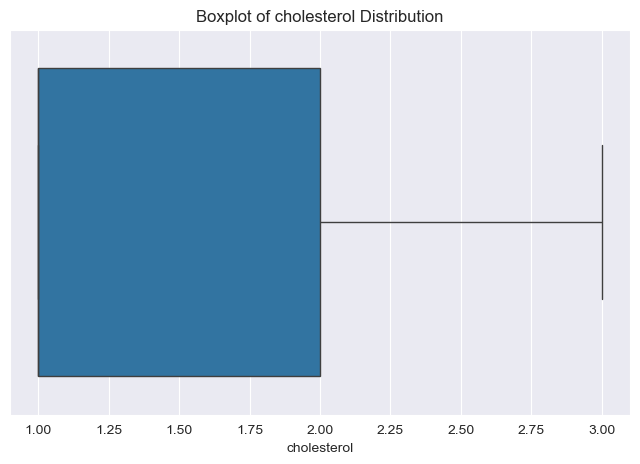

In [7]:
# Your code here:
q1_cholesterol = df["cholesterol"].quantile(0.25)
q3_cholesterol = df["cholesterol"].quantile(0.75)
iqr_cholesterol = q3_cholesterol - q1_cholesterol

print(f"Q1 (25th percentile of cholesterol): {q1_cholesterol:.2f}")
print(f"Q3 (75th percentile of cholesterol): {q3_cholesterol:.2f}")
print(f"Interquartile Range (IQR) of cholesterol: {iqr_cholesterol:.2f}")

# Visualize IQR using a boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["cholesterol"])
plt.title("Boxplot of cholesterol Distribution")
plt.show()

### **Exercise 5: Grouped Analysis by Gender**  
**Question:** Calculate the **mean** of the **"weight"** column grouped by **"gender"**. 


In [8]:
# Your code here:
gender_group = df.groupby('sex')['weight'].mean()
print(gender_group)

sex
1    72.565902
2    77.258565
3    69.818182
Name: weight, dtype: float64
